# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [2]:
# Import all required libraries
import pandas as pd
import numpy as np
from scipy import stats
from math import factorial
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [4]:
# Load the dataset
df = pd.read_csv('/Users/chrisasher/Downloads/games.csv')

In [5]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Check for duplicate entries
df.duplicated().sum()

0

### Key Questions to Answer:
- There are 16,715 entries in this dataset.
- Floats and objects are present in this dataset.
- Columns "User_Score" and "Rating" both possess the object datatype, but I think the float type woulbe be more useful in conducting mathematical and statistical analysis.
- Right away, there appear to be two blank entries in the "Name" column, while most other columns have no missing entries.  Only half of the games have a "Critic_Score" and/or "Rating" entry, with the "User_Score" column having few more.

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [9]:
# Convert column names to lowercase
def lowercase_columns(df):
    df.columns = df.columns.str.lower()
    return df
df = lowercase_columns(df)

In [10]:
# Verify the changes
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Data Type Conversion

In [12]:
# Check current data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [13]:
# Make changes to data types if necessary
# Describe the columns where the data types have been changed and why.
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['user_score'] = df['user_score'].astype(float)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB
None


I changed the column user_score to float dtype to perform statistical analysis on this dataset.  Changing the type to numeric changed every occurence of 'tbd' to a missing value, and I will replace every missing value with the median score for that column.

In [15]:
# finding the count of missing values in critic_score, user_score, and rating
print(df['critic_score'].isna().sum(),
     df['user_score'].isna().sum(),
     df['rating'].isna().sum())

8578 9125 6766


The majority of entries in critic_score and user_score are missing values.  

In [17]:
# getting statistical values for critic_score and user_score
print(df['critic_score'].median())
print(df['user_score'].median())

71.0
7.5


Replacing the missing values with the median value will maintain the normal distribution of values for each column.

In [19]:
# replace every occurence 'tbd' with the median of the existing user scores
critic_median = df['critic_score'].median()
user_median = df['user_score'].median()

#fill missing values with median
df.fillna({'critic_score': critic_median}, inplace=True)
df.fillna({'user_score': user_median}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


I replaced every missing value with the median value of the column in critic_score and user_score.

### 2.3 Handling Missing Values

In [22]:
# Examine missing values
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

In [23]:
# Calculate percentage of missing values
total_rows = len(df)
mv_rows = df.isna().any(axis=1).gt(0).sum()
mv_row_count = mv_rows.sum()
percent_mv = (mv_row_count / total_rows) *100

print(f"NaN appear in {mv_rows} rows ({percent_mv:.2f}% of the dataset).")

NaN appear in 6947 rows (41.56% of the dataset).


For the rows with missing values in 'name', 'year_of_release', and 'genre', it makes sense to just remove them since they represent a statistically insignificant portion of the dataset.  Because the missing values in 'rating' represent a statistically significiant portion of the dataset, it would be helpful to replace the missing values with the mode value, since 'rating' is a categorical column.

In [25]:
# Handle missing values based on analysis
df= df.dropna(subset=['name', 'year_of_release', 'genre'])

mode_rating = df['rating'].mode()[0]
df['rating'] = df['rating'].fillna(mode_rating)
print(mode_rating)
print(df['year_of_release'].head())


E
0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
Name: year_of_release, dtype: float64


Given that most of the missing values were in the scores and rating columns, it's possible those games were not popular enough for critics or users to score them.  Additionally, it could be an artifact of games released before internet reviews were popular. 

I filled the missing values in critic_score and user_score with the the median score, and the missing values in rating with the mode.

### 2.4 Calculate Total Sales

In [29]:
# Calculate total sales across all regions and put them in a different column
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['global_sales'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: global_sales, dtype: float64

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [31]:
# Create a DataFrame with game releases by year
game_year = df['year_of_release'].astype(int)

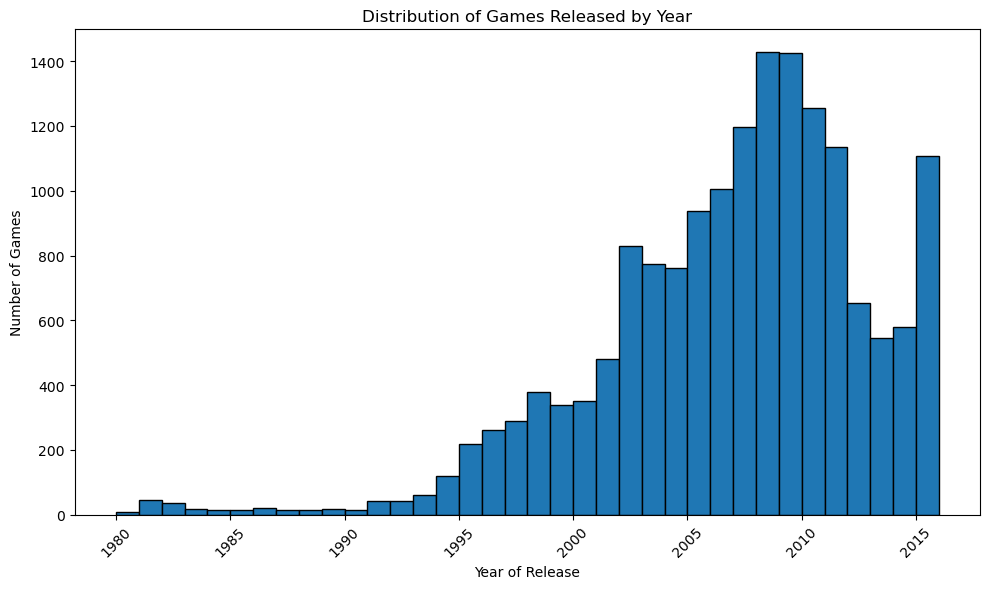

In [32]:
#bar plot for distribution of games across years
plt.figure(figsize=(10, 6))
plt.hist(game_year, bins=range(game_year.min(), game_year.max() + 1), edgecolor='black')
plt.title('Distribution of Games Released by Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
year_counts = game_year.value_counts().sort_values(ascending=False)

# Get the top year
most_active_year = year_counts.idxmax()
most_games = year_counts.max()

print(f"The year with the most games released is {most_active_year}, with {most_games} games.")

The year with the most games released is 2008, with 1427 games.


In [34]:
# Display summary statistics for each year
year_summary = df.groupby('year_of_release')['global_sales'].describe()
year_summary

,count,mean,std,min,25%,50%,75%,max
year_of_release,,,,,,,,
1980.0,9.0,1.264444,1.383547,0.23,0.3400,0.770,1.1500,4.31
1981.0,46.0,0.775652,0.783019,0.13,0.3125,0.465,0.9525,4.50
1982.0,36.0,0.802222,1.257910,0.14,0.3350,0.540,0.7800,7.81
1983.0,17.0,0.988235,0.838825,0.16,0.4000,0.770,1.1300,3.20
1984.0,14.0,3.596429,7.200795,0.27,1.1300,1.485,2.0900,28.31
1985.0,14.0,3.853571,10.510376,0.02,0.4650,1.015,1.4550,40.24
1986.0,21.0,1.765714,1.328001,0.30,1.1500,1.360,2.2000,6.50
1987.0,16.0,1.356250,1.225174,0.07,0.4550,0.885,2.2125,4.38
1988.0,15.0,3.147333,4.414414,0.03,0.9700,1.510,3.1450,17.28


- Years 2008 and 2009 saw the most games released.
- After 2011, the number of games released dropped significantly, reaching numbers seen around 2000. 
- Given that the trend after 2011 has been negative, we can assume that fewer games will be released in 2017 than 2016.  

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [37]:
# Calculate total sales by platform and year
sales_platform_year = df.groupby(['platform', 'year_of_release'])['global_sales'].sum().reset_index()
sales_platform_year = sales_platform_year.sort_values(['platform', 'year_of_release'])
sales_platform_year

,platform,year_of_release,global_sales
0,2600,1980.0,11.38
1,2600,1981.0,35.68
2,2600,1982.0,28.88
3,2600,1983.0,5.84
4,2600,1984.0,0.27
...,...,...,...
233,XB,2008.0,0.18
234,XOne,2013.0,18.96
235,XOne,2014.0,54.07
236,XOne,2015.0,60.14


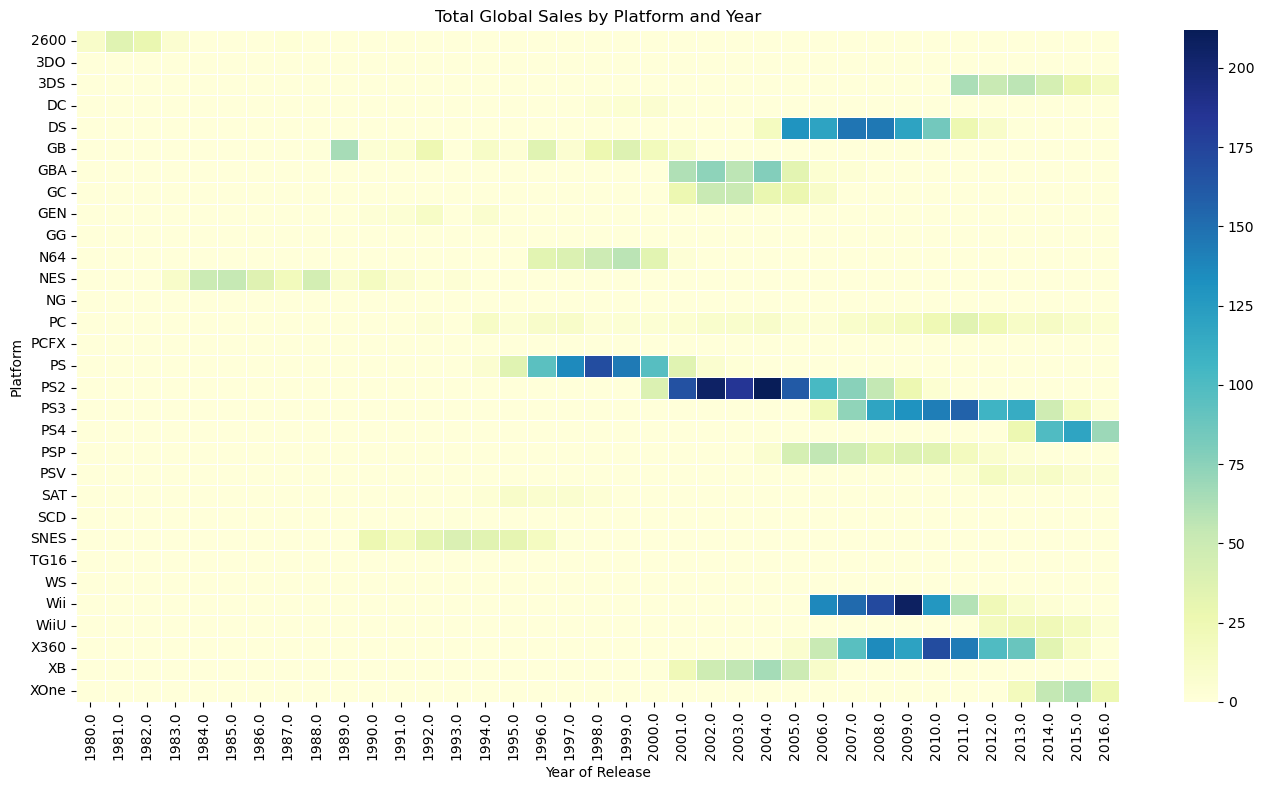

In [38]:
# Create a heatmap of platform sales over time
pivot_sales = df.pivot_table(index='platform', columns='year_of_release', values='global_sales', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14,8))
sns.heatmap(pivot_sales, cmap="YlGnBu", linewidths=0.5)
plt.title('Total Global Sales by Platform and Year')
plt.xlabel('Year of Release')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

In [39]:
# Identify platforms with declining sales
sales_platform_year['yearly_diff'] = (sales_platform_year.sort_values(['platform', 'year_of_release'])
                                      .groupby('platform')['global_sales'].diff())

def count_decline(group):
    group['decline'] = group['yearly_diff'] < 0
    group['decline_streak'] = group['decline'].rolling(window=3).sum()
    return group

platform_decline = sales_platform_year.groupby('platform').apply(count_decline, include_groups=False)
mask = platform_decline['decline_streak'] >= 3
declining_platforms = platform_decline.index.get_level_values('platform')[mask].unique()

print('Platforms with 3+ consecutive years of sales decline:')
print(declining_platforms)

Platforms with 3+ consecutive years of sales decline:
Index(['2600', '3DS', 'DC', 'DS', 'GBA', 'GC', 'N64', 'PS', 'PS2', 'PS3',
       'PSP', 'SAT', 'SNES', 'Wii', 'X360', 'XB'],
      dtype='object', name='platform')


- PC game sales have remained relatively stable from 1994 to 2016 while selling in lower numbers than the Playstion and XBox platforms.  Playstation and XBox platforms perform well across their respective generations.
- The 2600, several Nintendo platforms, as well as Playstation's PSP and PSV, along with vintage consoles like the SNES, N64, and GEN are all obsolete now.  Handheld systems seem to have disappeared, as well.  
- The typical lifecycle of a platform appears to be about 7 years.

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [42]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Justify your choice with data
relevant_years = [2014, 2015, 2016]
df_relevant = df[df['year_of_release'].isin(relevant_years)]
print(df_relevant)

                                            name platform  year_of_release  \
31                     Call of Duty: Black Ops 3      PS4           2015.0   
42                            Grand Theft Auto V      PS4           2014.0   
47     Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS           2014.0   
77                                       FIFA 16      PS4           2015.0   
87                  Star Wars Battlefront (2015)      PS4           2015.0   
...                                          ...      ...              ...   
16703                           Strawberry Nauts      PSV           2016.0   
16707                           Aiyoku no Eustia      PSV           2014.0   
16710              Samurai Warriors: Sanada Maru      PS3           2016.0   
16712                    Haitaka no Psychedelica      PSV           2016.0   
16714                        Winning Post 8 2016      PSV           2016.0   

              genre  na_sales  eu_sales  jp_sales  other_sales 

### Document Your Decision:
- What years did you select and why? The years 2014-16 represent the most recent data available.   
- How does this period reflect current market conditions?  Given the trend represented by these years, it is reasonable to assume the next year would follow that trend.
- What factors influenced your decision?  Current platforms are still relevant, so sales will not be split along existing platforms vs emerging platforms.  I know that technology has gotten more advanced as the years progress, and that games have become more complicated and more expensive to produce.  Given the sharp drop in games released in 2013, it is reasonable to assume that fewer games will be released in 2017 if the trend holds true.

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [45]:
# Analyze platform sales trends
#see next block

In [46]:
# Sort platforms by total sales
filtered_df = df[df['year_of_release'].between(2014, 2016)]
sales_filtered = filtered_df.groupby('platform')['global_sales'].sum().reset_index()
sales_filtered = sales_filtered.sort_values(by='global_sales', ascending=False)
sales_filtered

,platform,global_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22
7,WiiU,42.98
1,PC,27.05
5,PSV,22.40
6,Wii,5.07
4,PSP,0.36


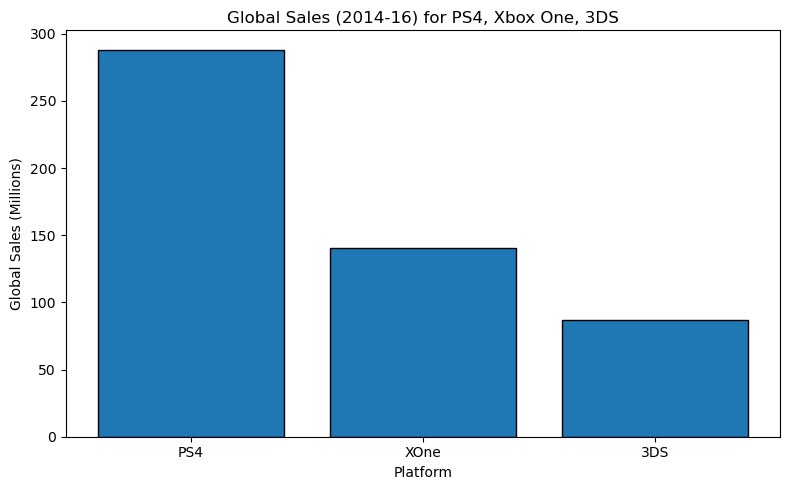

    platform  year_of_release  global_sales  yoy_growth  yoy_growth_pct  \
12       3DS           2011.0         63.20         NaN             NaN   
13       3DS           2012.0         51.36   -0.187342          -18.73   
14       3DS           2013.0         56.57    0.101441           10.14   
15       3DS           2014.0         43.76   -0.226445          -22.64   
16       3DS           2015.0         27.78   -0.365174          -36.52   
17       3DS           2016.0         15.14   -0.455004          -45.50   
153      PS4           2013.0         25.99         NaN             NaN   
154      PS4           2014.0        100.00    2.847634          284.76   
155      PS4           2015.0        118.90    0.189000           18.90   
156      PS4           2016.0         69.25   -0.417578          -41.76   
234     XOne           2013.0         18.96         NaN             NaN   
235     XOne           2014.0         54.07    1.851793          185.18   
236     XOne           20

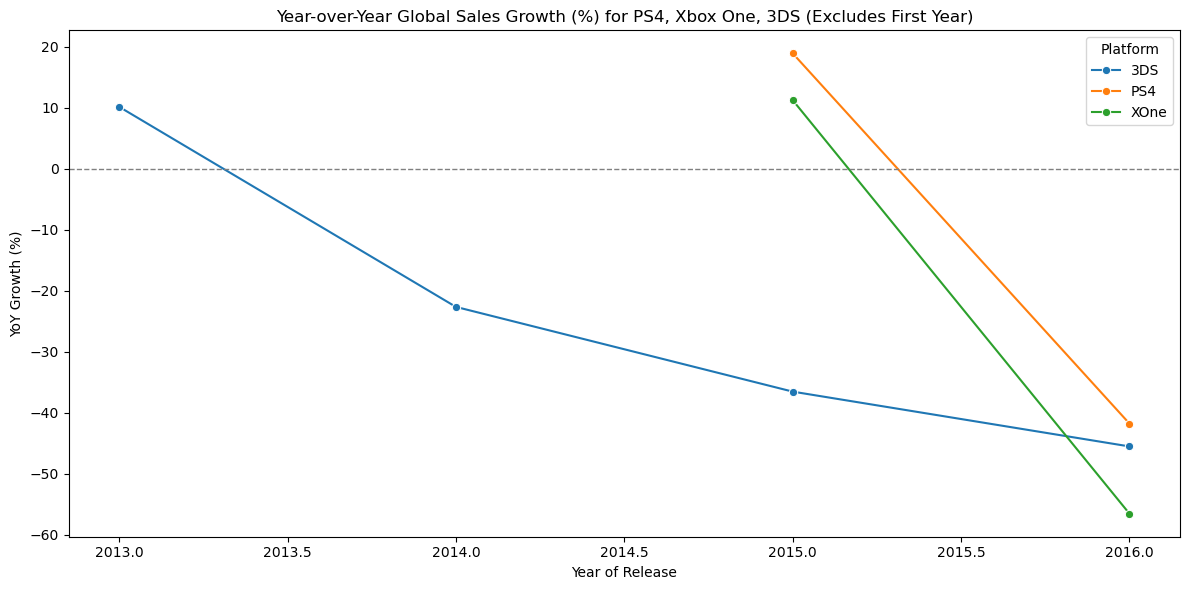

In [47]:
# Visualize top platforms
platforms = ['PS4', 'XOne', '3DS']
filtered_df = df[(df['year_of_release'].between(2014, 2016)) & (df['platform'].isin(platforms))]

sales_summary = (filtered_df.groupby('platform')['global_sales'].sum().reindex(platforms, fill_value=0).reset_index())

plt.figure(figsize=(8, 5))
plt.bar(sales_summary['platform'], sales_summary['global_sales'], edgecolor='black')
plt.title('Global Sales (2014-16) for PS4, Xbox One, 3DS')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.tight_layout()
plt.show()

# Calculate year-over-year growth for each platform
sales_by_year = df.groupby(['platform', 'year_of_release'])['global_sales'].sum().reset_index()
sales_by_year = sales_by_year.sort_values(['platform', 'year_of_release'])
sales_by_year['yoy_growth'] = sales_by_year.groupby('platform')['global_sales'].pct_change()
sales_by_year['yoy_growth_pct'] = (sales_by_year['yoy_growth'] * 100).round(2)
sales_by_year['year_rank'] = sales_by_year.groupby('platform')['year_of_release'].rank(method='first')
filtered_growth = sales_by_year[sales_by_year['year_rank'] > 2]
sales_by_year = sales_by_year[sales_by_year['platform'].isin(['PS4', 'XOne', '3DS'])]
print(sales_by_year)

# Your code here to calculate and visualize platform growth rates
filtered_growth = filtered_growth[filtered_growth['platform'].isin(['PS4', 'XOne', '3DS'])]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_growth, x='year_of_release', y='yoy_growth_pct', hue='platform', marker='o')

plt.title('Year-over-Year Global Sales Growth (%) for PS4, Xbox One, 3DS (Excludes First Year)')
plt.xlabel('Year of Release')
plt.ylabel('YoY Growth (%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

Platform sales in this time period show high initial positions with dramatic negative trend as the years progress.  Given that the life cycle of a platform is about 7 years from previous data, it appears that most consumers purchase a platform as soon as it is released, if not shortly after.

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

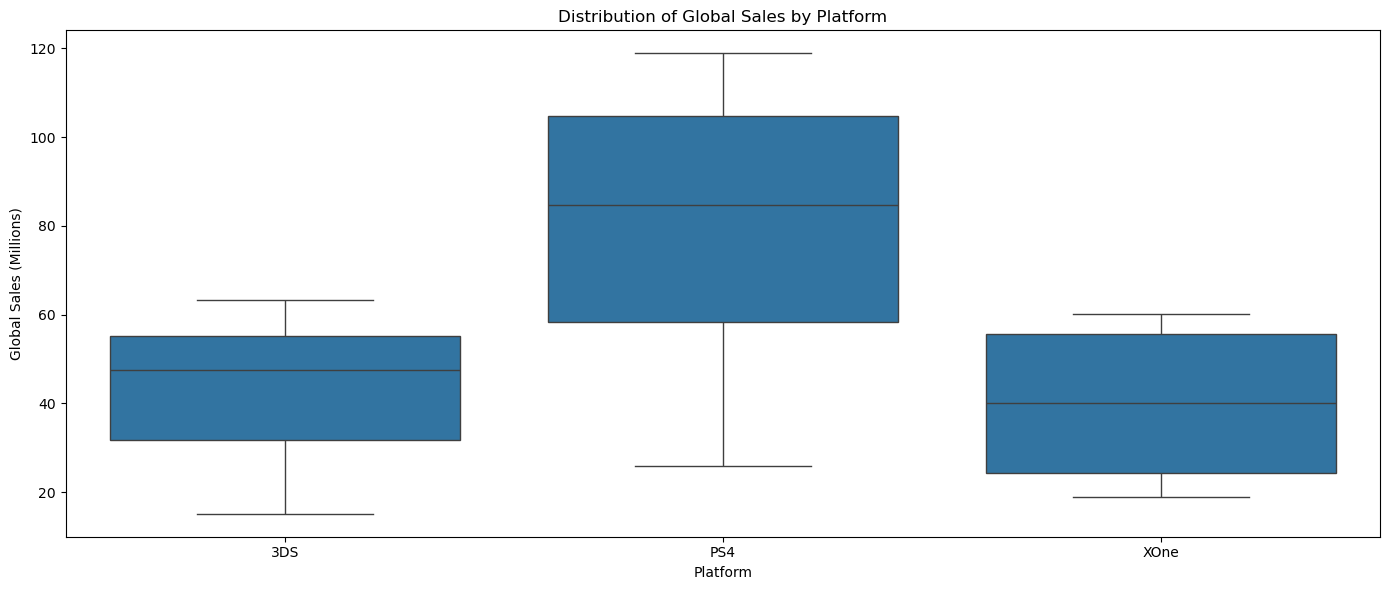

In [50]:
# Create box plot of sales by platform

plt.figure(figsize=(14,6))
sns.boxplot(data=sales_by_year, x='platform', y='global_sales')
plt.title('Distribution of Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.tight_layout()
plt.show()

In [51]:
# Calculate detailed statistics for each platform

#stats for 3DS
threeds_stats = sales_by_year[sales_by_year['platform'] == '3DS']
print(threeds_stats.describe())

#stats for PS4
ps4_stats = sales_by_year[sales_by_year['platform'] == 'PS4']
print(ps4_stats.describe())

#stats for Xbox One
xone_stats = sales_by_year[sales_by_year['platform'] == 'XOne']
print(xone_stats.describe())

       year_of_release  global_sales  yoy_growth  yoy_growth_pct  year_rank
count         6.000000      6.000000    5.000000         5.00000   6.000000
mean       2013.500000     42.968333   -0.226505       -22.65000   3.500000
std           1.870829     18.278261    0.212440        21.24294   1.870829
min        2011.000000     15.140000   -0.455004       -45.50000   1.000000
25%        2012.250000     31.775000   -0.365174       -36.52000   2.250000
50%        2013.500000     47.560000   -0.226445       -22.64000   3.500000
75%        2014.750000     55.267500   -0.187342       -18.73000   4.750000
max        2016.000000     63.200000    0.101441        10.14000   6.000000
       year_of_release  global_sales  yoy_growth  yoy_growth_pct  year_rank
count         4.000000      4.000000    3.000000        3.000000   4.000000
mean       2014.500000     78.535000    0.873019       87.300000   2.500000
std           1.290994     40.567917    1.736753      173.674257   1.290994
min        2

Across the total lifespan of these three platforms during 2014-16, Playstation 4 sold the most games, far outpacing both 3DS and Xbox One game sales.

## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [54]:
# Choose a popular platform based on your previous analysis
# chose PS2 as most popular based on total sales and games released
pop_platform = df[df['platform'] == 'PS4']
pop_platform.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
304,Assassin's Creed: Unity,PS4,2014.0,Action,1.19,2.07,0.08,0.62,70.0,4.9,M,3.96
2848,Disney Infinity 3.0,PS4,2015.0,Action,0.24,0.37,0.00,0.12,71.0,7.5,E,0.73
13078,Game of Thrones (Telltale),PS4,2015.0,Adventure,0.04,0.00,0.00,0.01,71.0,7.5,E,0.05
10252,Wasteland 2,PS4,2015.0,Role-Playing,0.08,0.00,0.02,0.02,71.0,7.5,E,0.12
4944,Just Dance 2015,PS4,2014.0,Misc,0.19,0.13,0.00,0.07,72.0,5.8,E10+,0.39
7585,Odin Sphere: Leifthrasir,PS4,2016.0,Role-Playing,0.07,0.04,0.07,0.02,87.0,8.2,T,0.20
10736,Natural Doctrine,PS4,2014.0,Role-Playing,0.05,0.02,0.02,0.01,53.0,6.0,M,0.10
5008,Deus Ex: Mankind Divided,PS4,2016.0,Role-Playing,0.11,0.21,0.00,0.06,84.0,7.6,M,0.38
9766,Don Bradman Cricket 14,PS4,2015.0,Sports,0.01,0.09,0.00,0.02,76.0,7.4,E,0.12
3848,Lords of the Fallen,PS4,2014.0,Role-Playing,0.18,0.24,0.02,0.08,68.0,6.6,M,0.52


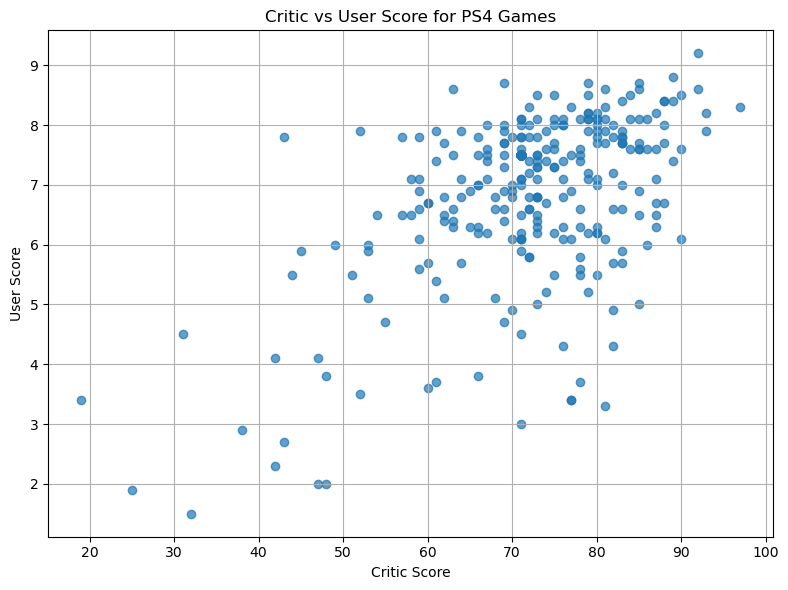

In [55]:
# Create scatter plots for both critic and user scores
# used .copy() because I was getting warning "SettingWithCopyWarning"
pop_platform = df[df['platform'] == 'PS4'].copy()
pop_platform['user_score'] = pd.to_numeric(pop_platform['user_score'], errors='coerce')
pop_platform.loc[pop_platform['user_score'] > 10, 'user_score'] /= 10
plt.figure(figsize=(8,6))
plt.scatter(pop_platform['critic_score'], pop_platform['user_score'], alpha=0.7)
plt.title('Critic vs User Score for PS4 Games')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.grid(True)
plt.tight_layout()
plt.show()

Most games scored between low 70s and low 90s, while few games scored higher than 90 and less than 70.

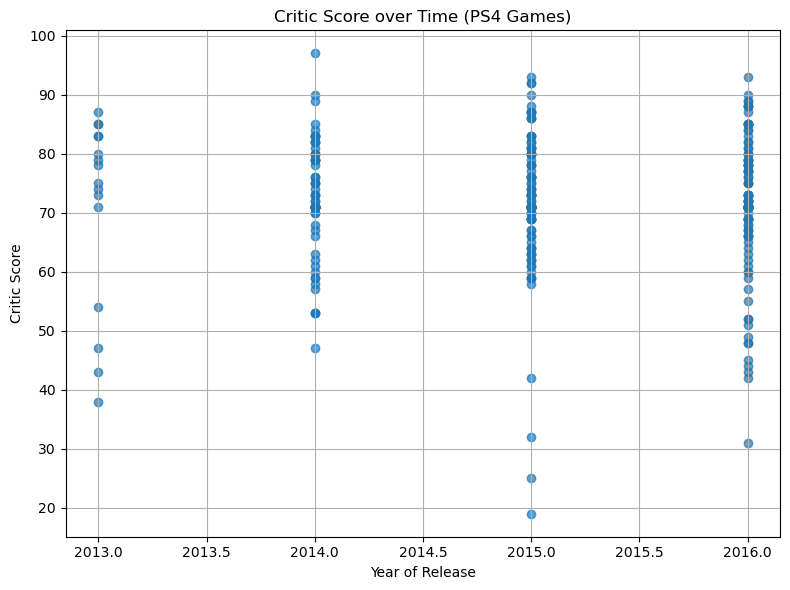

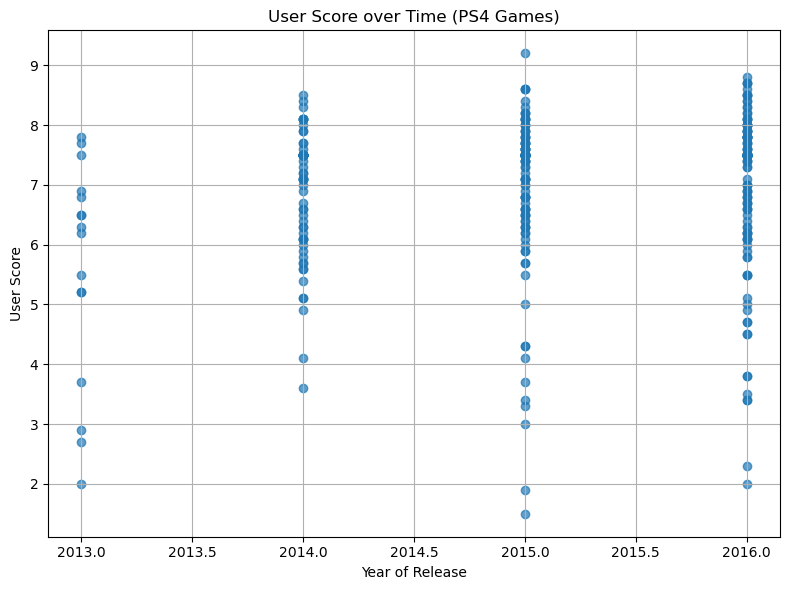

                 critic_score  user_score  year_of_release
critic_score         1.000000    0.507069        -0.024404
user_score           0.507069    1.000000         0.156597
year_of_release     -0.024404    0.156597         1.000000


In [57]:
# Critic Scores
plt.figure(figsize=(8, 6))
plt.scatter(pop_platform['year_of_release'], pop_platform['critic_score'], alpha=0.7)
plt.title('Critic Score over Time (PS4 Games)')
plt.xlabel('Year of Release')
plt.ylabel('Critic Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# User Scores
plt.figure(figsize=(8, 6))
plt.scatter(pop_platform['year_of_release'], pop_platform['user_score'], alpha=0.7)
plt.title('User Score over Time (PS4 Games)')
plt.xlabel('Year of Release')
plt.ylabel('User Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate correlations
score_data = pop_platform[['critic_score', 'user_score', 'year_of_release']]
score_correlation = score_data.corr(method='pearson')
print(score_correlation)

Critics scored games on a wider scale than users.  Users scored less games below the 6 mark than critics, while maintaining a similar scoring pattern across time.

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [60]:
# Find games released on multiple platforms
#searching years 2014-2016
def find_multi_platform_games(df):
    time_14_16 = df[df['year_of_release'].between(2014, 2016)]
    counts_14_16 = time_14_16.groupby('name')['platform'].nunique()
    multi_14_16 = time_14_16[time_14_16['name'].isin(counts_14_16[counts_14_16 > 1].index)]
    return multi_14_16

multi_14_16 = find_multi_platform_games(df)

print('Recent Period Games (2014-2016):')
print(multi_14_16[['name', 'platform', 'year_of_release']].sort_values('name'))

Recent Period Games (2014-2016):
                                      name platform  year_of_release
4550            2014 FIFA World Cup Brazil     X360           2014.0
3271            2014 FIFA World Cup Brazil      PS3           2014.0
7116     3rd Super Robot Wars Z Jigoku Hen      PS3           2014.0
7890     3rd Super Robot Wars Z Jigoku Hen      PSV           2014.0
8820   3rd Super Robot Wars Z: Tengoku-Hen      PS3           2015.0
...                                    ...      ...              ...
12405       Zero Escape: Zero Time Dilemma      PSV           2016.0
12761                               ZombiU      PS4           2016.0
16645                               ZombiU     XOne           2016.0
7539                   Zombie Army Trilogy      PS4           2015.0
10316                  Zombie Army Trilogy     XOne           2015.0

[1101 rows x 3 columns]


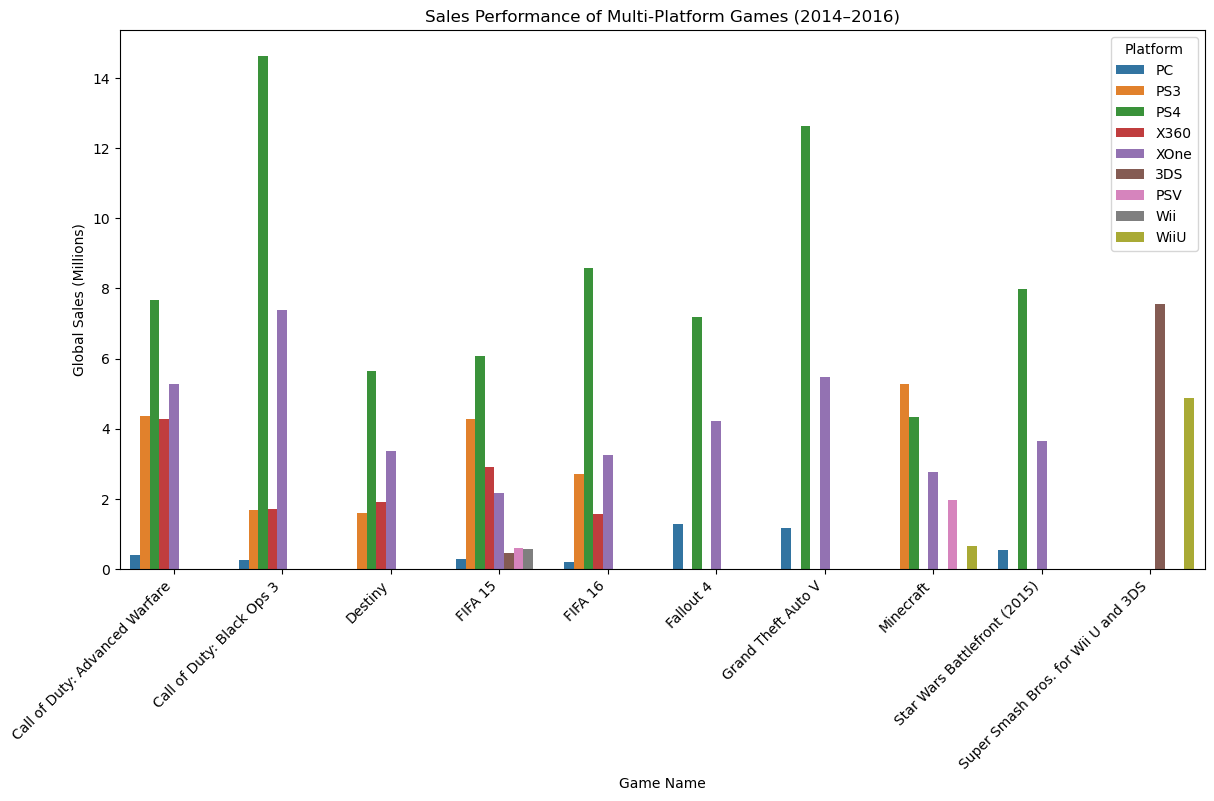

In [61]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance
#for years 2014-2016
sales_14_16 = (multi_14_16.groupby(['name', 'platform'])['global_sales'].sum().reset_index())
top_14_16_names = sales_14_16.groupby('name')['global_sales'].sum().nlargest(10).index # top 10 games
top_14_16 = sales_14_16[sales_14_16['name'].isin(top_14_16_names)]

#grouped bar chart for visualization
plt.figure(figsize=(14, 7))
sns.barplot(data=top_14_16, x='name', y='global_sales', hue='platform')
plt.title('Sales Performance of Multi-Platform Games (2014–2016)')
plt.ylabel('Global Sales (Millions)')
plt.xlabel('Game Name')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform')
plt.show()

In the years 2014-2016, Playstation 4 dominated the market, followed distantly by Xbox One.  

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [64]:
# Analyze genre performance
# Sort genres by total sales
genre_sales = (df.groupby('genre')['global_sales'].sum().sort_values(ascending=False).reset_index())
print(genre_sales)

           genre  global_sales
0         Action       1716.52
1         Sports       1309.67
2        Shooter       1041.36
3   Role-Playing        931.08
4       Platform        825.55
5           Misc        790.29
6         Racing        723.49
7       Fighting        442.66
8     Simulation        387.96
9         Puzzle        239.89
10     Adventure        233.33
11      Strategy        172.57


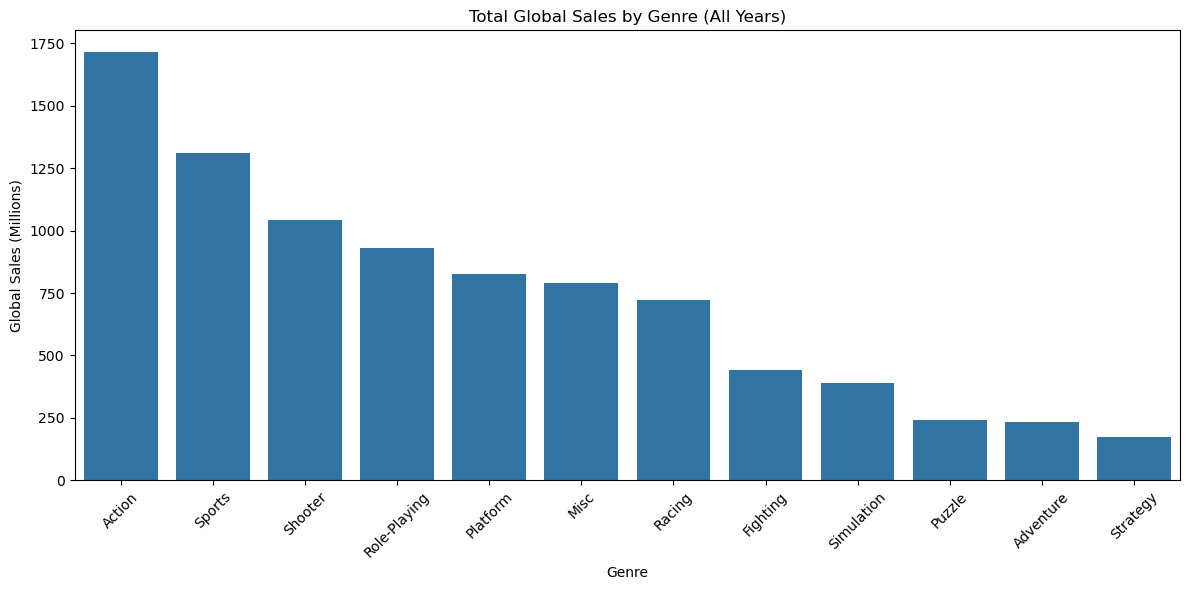

In [65]:
# Visualize genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales, x='genre', y='global_sales')
plt.title('Total Global Sales by Genre (All Years)')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

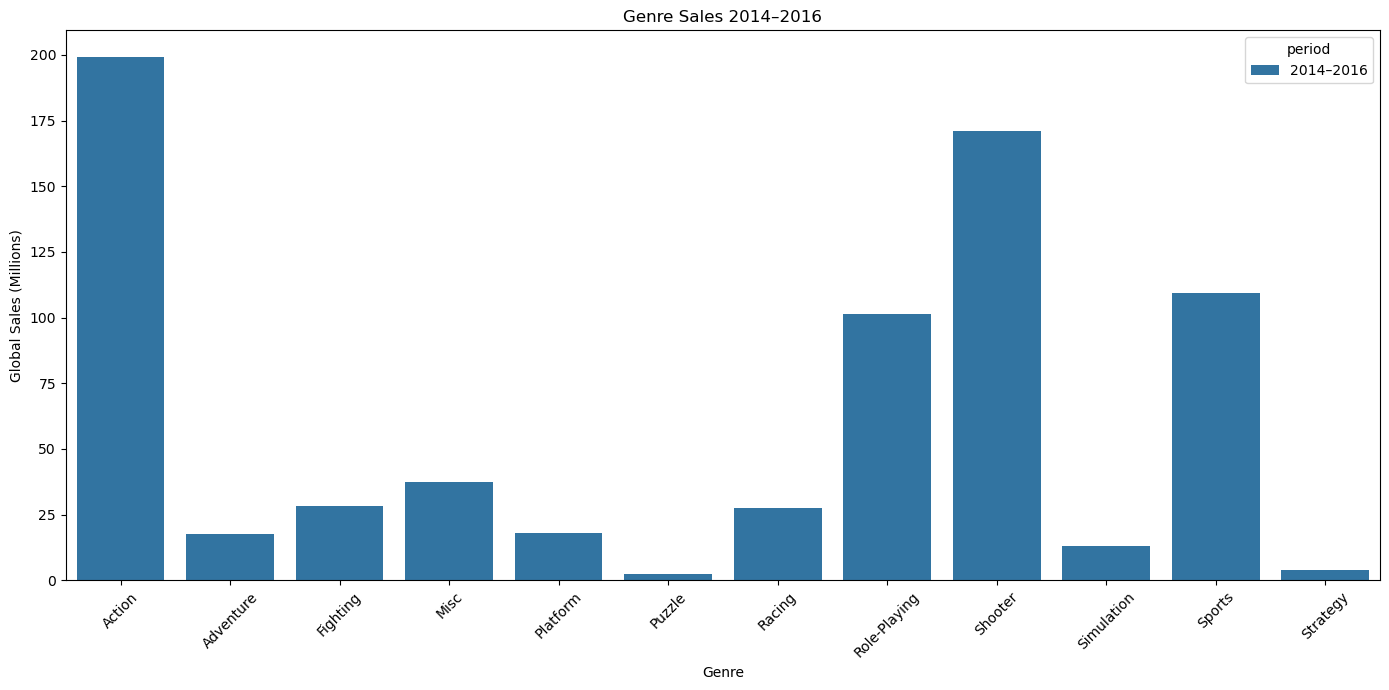

In [66]:
#visualizing 2014-2016
late_genre = df[df['year_of_release'].between(2014, 2016)]
late_sales = late_genre.groupby('genre')['global_sales'].sum().reset_index()
late_sales['period'] = '2014–2016'

# barplot
plt.figure(figsize=(14, 7))
sns.barplot(data=late_sales, x='genre', y='global_sales', hue='period')

plt.title('Genre Sales 2014–2016')
plt.ylabel('Global Sales (Millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Action, Shooter, Sports, and Role-Playing are the highest selling genres.  

In [68]:
# Calculate market share for each genre
late = df[df['year_of_release'].between(2014, 2016)]
late_genre_sales = late.groupby('genre')['global_sales'].sum().reset_index()
total_late_sales = late_genre_sales['global_sales'].sum()

late_genre_sales['market_share'] = (late_genre_sales['global_sales'] / total_late_sales * 100).round(2)
late_genre_sales['period'] = '2014–2016'
print(late_genre_sales)

           genre  global_sales  market_share     period
0         Action        199.36         27.33  2014–2016
1      Adventure         17.55          2.41  2014–2016
2       Fighting         28.22          3.87  2014–2016
3           Misc         37.55          5.15  2014–2016
4       Platform         18.09          2.48  2014–2016
5         Puzzle          2.21          0.30  2014–2016
6         Racing         27.52          3.77  2014–2016
7   Role-Playing        101.44         13.91  2014–2016
8        Shooter        170.94         23.43  2014–2016
9     Simulation         13.13          1.80  2014–2016
10        Sports        109.48         15.01  2014–2016
11      Strategy          3.96          0.54  2014–2016


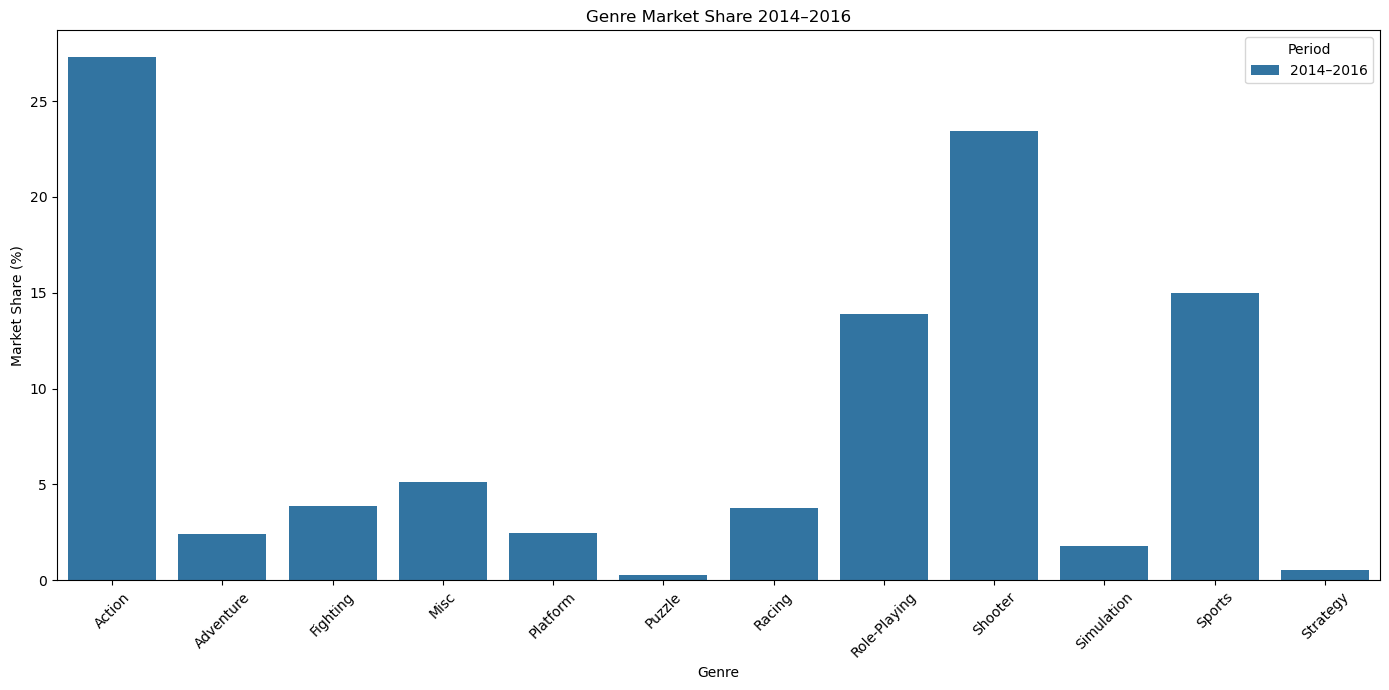

In [69]:
#barplot
plt.figure(figsize=(14, 7))
sns.barplot(data=late_genre_sales, x='genre', y='market_share', hue='period')

plt.title('Genre Market Share 2014–2016')
plt.ylabel('Market Share (%)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()
plt.show()

As we can see, market share mirrors the previous sales graph.

### Key Questions for Genre Analysis:
- Action and Shooter games consistently performed well.
- All other gneres bseides Action, Shooter, Sports, and Role-Playing are significantly less popular.
- We can see that the genre spread is localized to 4 frontrunners, far out-pacing the rest of genres.  

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [73]:
# Function to analyze platform performance by region
def platform_by_region(df, regions=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']):
    platform_region_sales = df.groupby('platform')[regions].sum()
    platform_region_sales = platform_region_sales.sort_values('global_sales', ascending=False)
    return platform_region_sales
platform_region_sales = platform_by_region(df)
print(platform_region_sales)

          na_sales  eu_sales  jp_sales  other_sales  global_sales
platform                                                         
PS2         572.92    332.63    137.54       190.47       1233.56
X360        595.74    268.32     12.30        84.88        961.24
PS3         390.13    327.21     79.41       134.59        931.34
Wii         486.87    258.32     68.28        77.71        891.18
DS          380.31    188.41    175.02        59.04        802.78
PS          334.72    212.39    139.78        40.69        727.58
PS4         108.74    141.09     15.96        48.35        314.14
GBA         184.12     74.59     46.56         7.61        312.88
PSP         107.27     65.62     75.88        40.76        289.53
3DS          82.65     61.27    100.62        13.27        257.81
PC           93.34    140.37      0.17        21.88        255.76
GB          113.64     47.51     85.12         8.16        254.43
XB          182.06     59.65      1.38         8.48        251.57
NES       

In [74]:
# Analyze each region
def platform_sales_by_region(df, region='na_sales'):
    region_sales = df.groupby('platform')[region].sum().sort_values(ascending=False)
    return region_sales
na = platform_sales_by_region(df, 'na_sales')
eu = platform_sales_by_region(df, 'eu_sales')
jp = platform_sales_by_region(df, 'jp_sales')
other = platform_sales_by_region(df, 'other_sales')

#combine into one df
regional_breakdown = pd.DataFrame({'NA Sales': na, 'EU Sales': eu, 'JP Sales': jp, 'Other Sales': other}).fillna(0).astype(float).sort_values('NA Sales', ascending = False)
print(regional_breakdown)

          NA Sales  EU Sales  JP Sales  Other Sales
platform                                           
X360        595.74    268.32     12.30        84.88
PS2         572.92    332.63    137.54       190.47
Wii         486.87    258.32     68.28        77.71
PS3         390.13    327.21     79.41       134.59
DS          380.31    188.41    175.02        59.04
PS          334.72    212.39    139.78        40.69
GBA         184.12     74.59     46.56         7.61
XB          182.06     59.65      1.38         8.48
N64         138.91     41.03     33.76         4.31
GC          131.94     38.32     21.34         5.13
NES         125.94     21.15     98.65         5.31
GB          113.64     47.51     85.12         8.16
PS4         108.74    141.09     15.96        48.35
PSP         107.27     65.62     75.88        40.76
PC           93.34    140.37      0.17        21.88
XOne         93.12     51.59      0.34        14.27
3DS          82.65     61.27    100.62        13.27
2600        

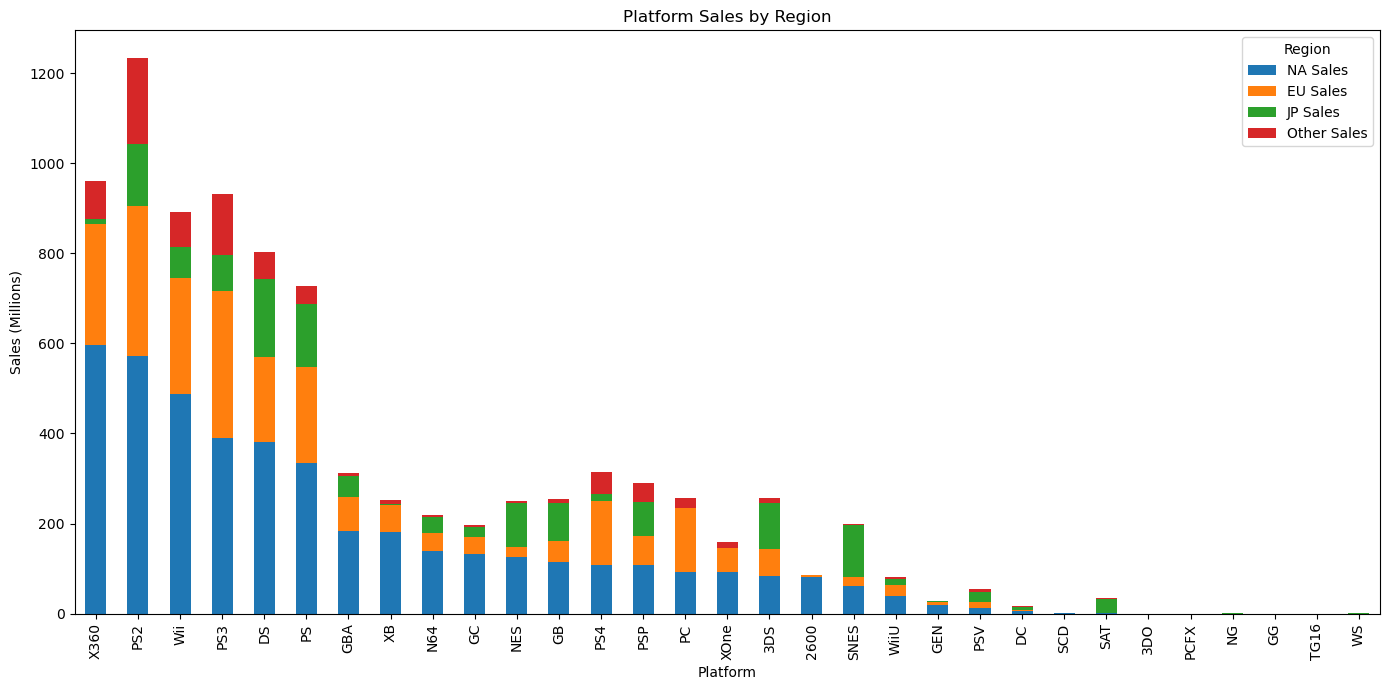

In [75]:
#stacked bar chart
regional_breakdown.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Platform Sales by Region')
plt.ylabel('Sales (Millions)')
plt.xlabel('Platform')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [77]:
# Create a comparative platform analysis
def get_platform_region_sales(df):
    region_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    region_sales = df.groupby('platform')[region_cols].sum()
    return region_sales
platform_region_sales = get_platform_region_sales(df)
print(platform_region_sales)

def normalize_platforms(region_sales):
    return (region_sales.T / region_sales.sum(axis=1)).T.round(2)
platform_relative = normalize_platforms(platform_region_sales)
platform_relative = platform_relative.loc[platform_region_sales.sum(axis=1).sort_values(ascending=False).index]
print(platform_relative)

          na_sales  eu_sales  jp_sales  other_sales
platform                                           
2600         80.78      4.86      0.00         0.84
3DO           0.00      0.00      0.10         0.00
3DS          82.65     61.27    100.62        13.27
DC            5.43      1.69      8.56         0.27
DS          380.31    188.41    175.02        59.04
GB          113.64     47.51     85.12         8.16
GBA         184.12     74.59     46.56         7.61
GC          131.94     38.32     21.34         5.13
GEN          19.27      5.52      2.67         0.89
GG            0.00      0.00      0.04         0.00
N64         138.91     41.03     33.76         4.31
NES         125.94     21.15     98.65         5.31
NG            0.00      0.00      1.44         0.00
PC           93.34    140.37      0.17        21.88
PCFX          0.00      0.00      0.03         0.00
PS          334.72    212.39    139.78        40.69
PS2         572.92    332.63    137.54       190.47
PS3         

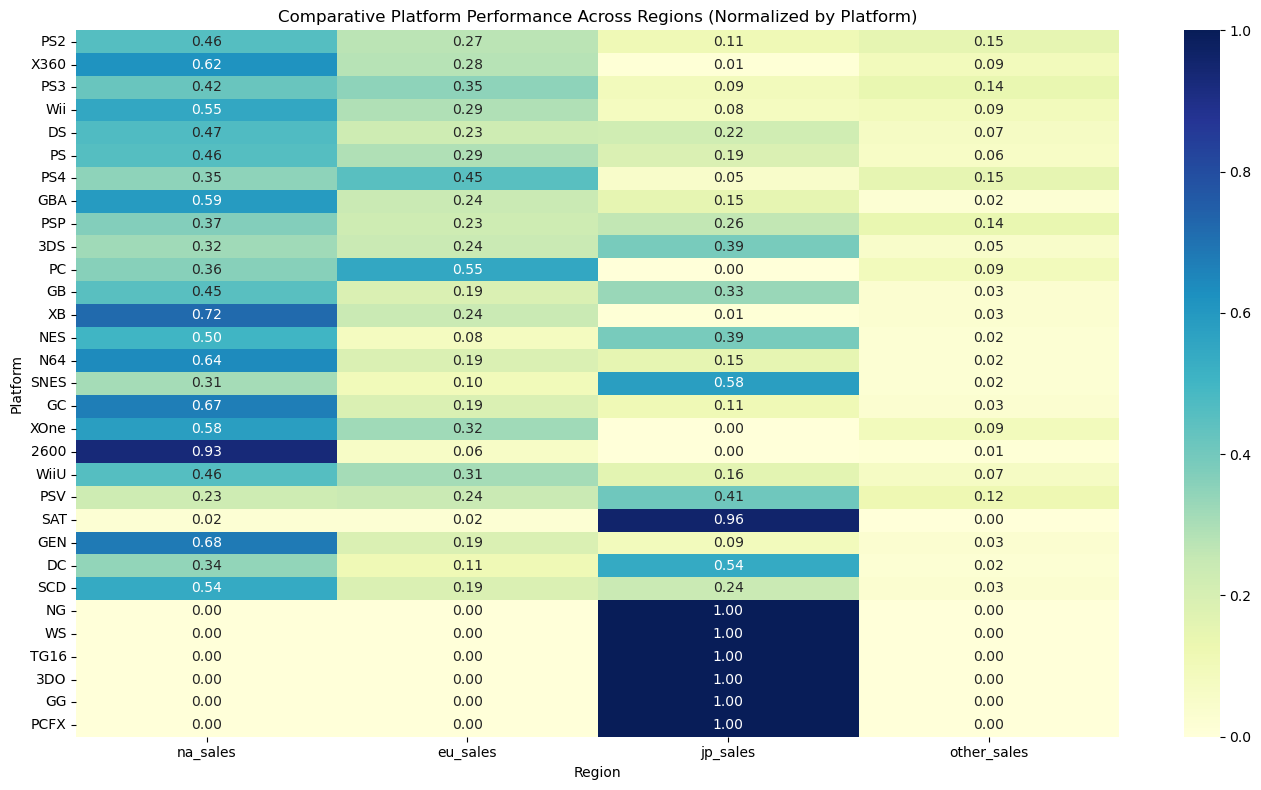

In [78]:
# Visualize cross-regional comparison for top platforms
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(platform_relative, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Comparative Platform Performance Across Regions (Normalized by Platform)')
plt.xlabel('Region')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

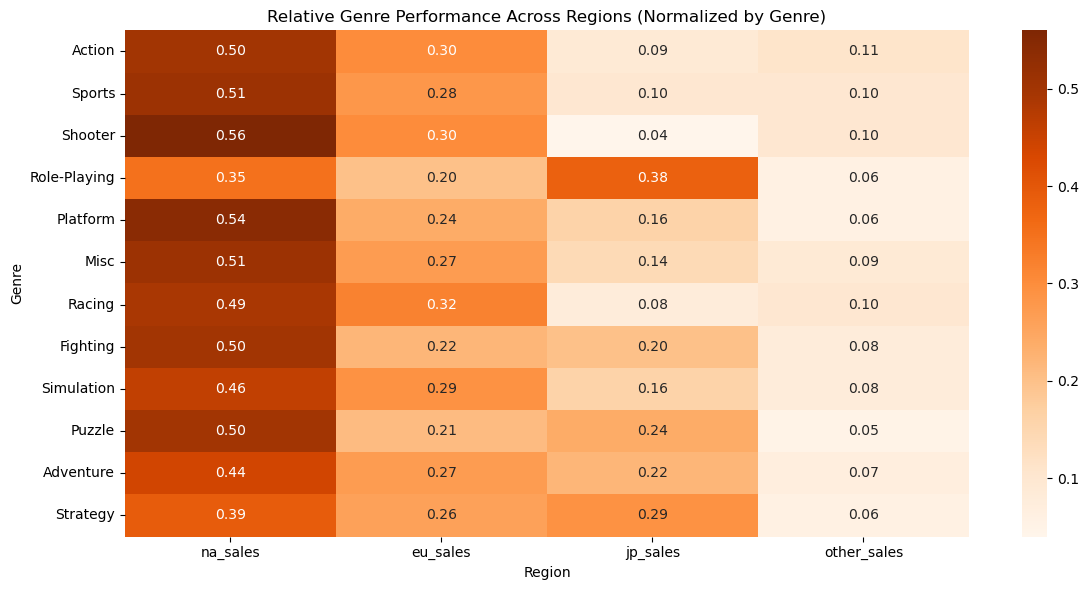

In [80]:
# Function to analyze genre performance by region
def genre_performance_by_region(df):
    region_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    genre_sales = df.groupby('genre')[region_cols].sum()
    return genre_sales

def normalize_genre_rows(genre_sales):
    return (genre_sales.T / genre_sales.sum(axis=1)).T.round(2)

genre_region_sales = genre_performance_by_region(df)
genre_relative = normalize_genre_rows(genre_region_sales)
genre_relative = genre_relative.loc[genre_region_sales.sum(axis=1).sort_values(ascending=False).index]

# heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(genre_relative, cmap='Oranges', annot=True, fmt='.2f')
plt.title('Relative Genre Performance Across Regions (Normalized by Genre)')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

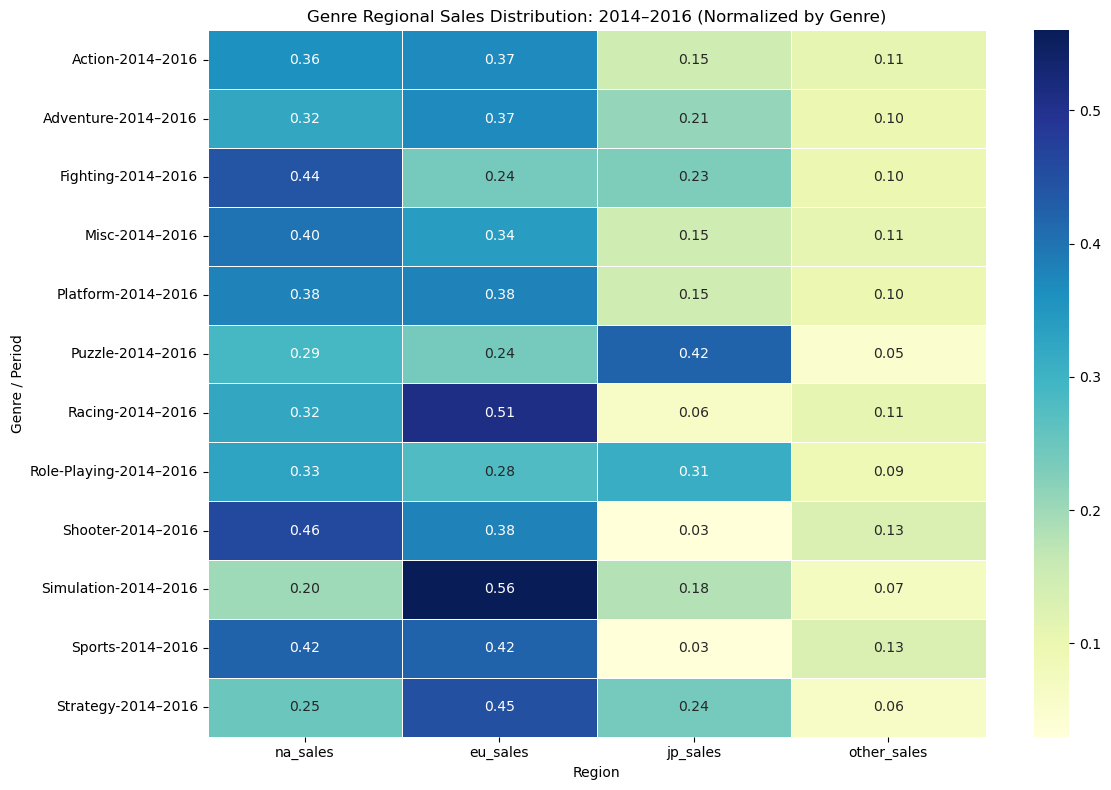

In [82]:
# Create a comparative genre analysis
#revisit late time period
late = df[df['year_of_release'].between(2014, 2016)]

def regional_genre_sales(data, label):
    region_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    grouped = data.groupby('genre')[region_cols].sum()
    grouped = (grouped.T / grouped.sum(axis=1)).T.round(2)  # Normalize by genre (row)
    grouped['period'] = label
    return grouped.reset_index()

late_genre = regional_genre_sales(late, '2014–2016')

#heatmap
heatmap_data = late_genre.set_index(['genre', 'period'])
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Genre Regional Sales Distribution: 2014–2016 (Normalized by Genre)')
plt.xlabel('Region')
plt.ylabel('Genre / Period')
plt.tight_layout()
plt.show()

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [84]:
# Function to analyze ESRB rating impact
region_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']
rating_sales = df.groupby('rating')[region_cols].sum().reset_index()

In [85]:
# Analyze ESRB impact for each region
rating_share = rating_sales.set_index('rating')[region_cols]
rating_share_normalized = (rating_share / rating_share.sum()) * 100
rating_share_normalized = rating_share_normalized.round(2)

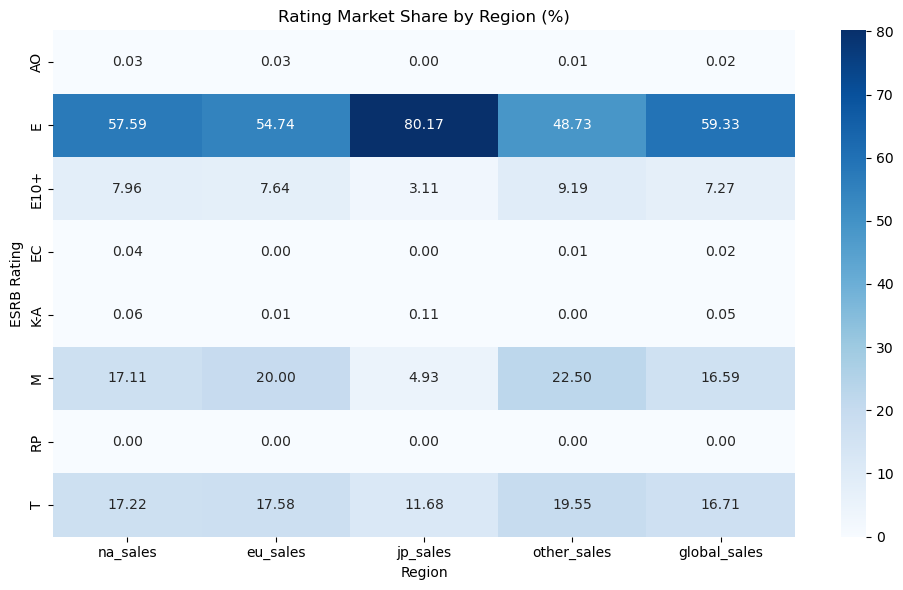

In [86]:
# heatmap to visualize market share
plt.figure(figsize=(10, 6))
sns.heatmap(rating_share_normalized, annot=True, cmap='Blues', fmt='.2f')
plt.title('Rating Market Share by Region (%)')
plt.xlabel('Region')
plt.ylabel('ESRB Rating')
plt.tight_layout()
plt.show()

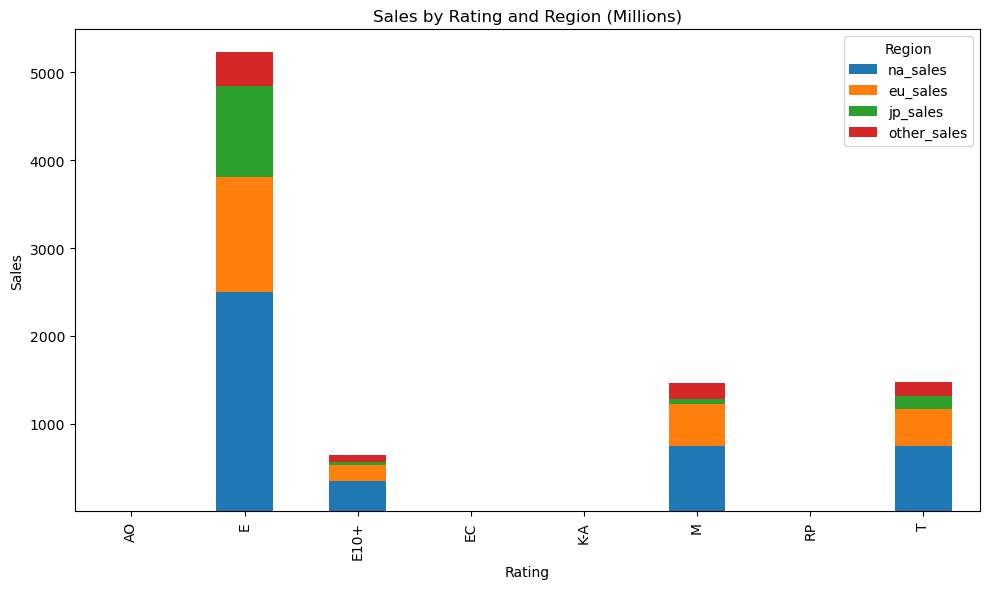

In [87]:
# stacked bar chart for raw sales
rating_sales_plot = rating_sales.set_index('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
rating_sales_plot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sales by Rating and Region (Millions)')
plt.ylabel('Sales')
plt.xlabel('Rating')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

Games rated E sold the most copies by far across all regions, followed by T and M across all regions.  Ratings T and M sold in similar numbers across all regions with the EU an Other markets favoring games rated M.  The Japan market significantly favors games rated E.

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


In [90]:
alpha = 0.05

# Ensure numeric conversion of user scores
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Filter each platform and drop NaNs
xbox_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()

# Perform Welch’s t-test
t_stat, p_value = stats.ttest_ind(xbox_scores, pc_scores, equal_var=False)

# Output
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis – there IS a difference in user ratings.")
else:
    print("Fail to reject the null hypothesis – no significant difference in user ratings.")


T-statistic: -4.130, P-value: 0.0000
Reject the null hypothesis – there IS a difference in user ratings.


In [91]:
alpha = 0.05

action_scores = df[df['genre'] == 'Action']['user_score'].dropna()
sports_scores = df[df['genre'] == 'Sports']['user_score'].dropna()


t_stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject null hypothesis — user ratings differ between Action and Sports.")
else:
    print("Fail to reject null hypothesis — no significant difference in user ratings.")

T-statistic: 0.569, P-value: 0.5697
Fail to reject null hypothesis — no significant difference in user ratings.


I used an indepedent two-sample t-test to compare averages.  Null hypothesis assumes no change, and alternative hypothesis assumes change.  The samples are independent, user scores are continuous, 0.05 was chosen for alpha to control a Type 1 error (false positive).

In test 1, the P-value was less than the the alpha, which indicates there is significant difference in user ratings between Xbox One and PC platforms.
In test 2, the P-value was greater than the alpha which indicates user ratings do not differ between Action and Sports significantly.

# Step 6. Write a general conclusion


In this project, I have examined game sales by region, genre, and platform across more than almost 40 years of releases.  Playstation games dominate the market across regions and the most recent years (2014-2016).  The most popular genres were action and shooter games.  The North American market represents the greatest market share of consumers, so the most profitable combination of factors for 2017 include a Playstation 4 action/shooter game released in North America.